In [2]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import os

,SPX,VIX
date,,
2014-02-21,2043.3871,14.68
2014-02-24,2056.1417,14.23
2014-02-25,2051.1438,13.67
2014-02-26,2053.2382,14.35
2014-02-27,2066.4070,14.04


,SPX,VIX
count,1258.000000,1258.000000
mean,2768.968118,14.965890
std,569.045340,4.298676
min,2042.883700,9.140000
25%,2319.402900,12.080000
50%,2491.279400,13.830000
75%,3355.089050,16.629999
max,3918.542500,40.740002


array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

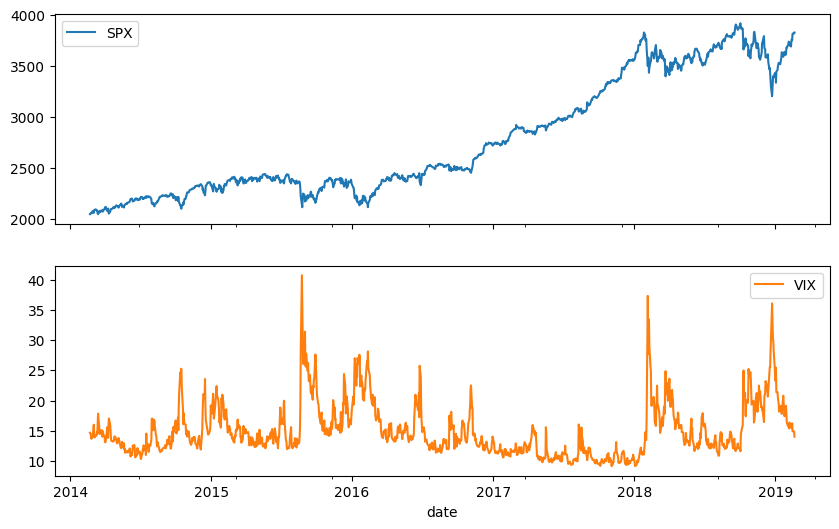

In [70]:
# get SPX (sum of previous data) and VIX volatility
data = pd.DataFrame()
for name in os.listdir('.'):
    if '.csv' in name and name != 'VIX.csv':
        raw = pd.read_csv(name, index_col=0, parse_dates=True)
        add = pd.DataFrame(raw['close'])
        data = data.add(add, axis=0, fill_value=0)
data.rename({'close':'SPX'},axis=1,inplace=True)

vix = pd.read_csv('VIX.csv', index_col=0, parse_dates=True)
data['VIX'] = vix['Close']

display(data.head())
display(data.describe())

fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(10,6)
data.plot(ax=ax, subplots=True)

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

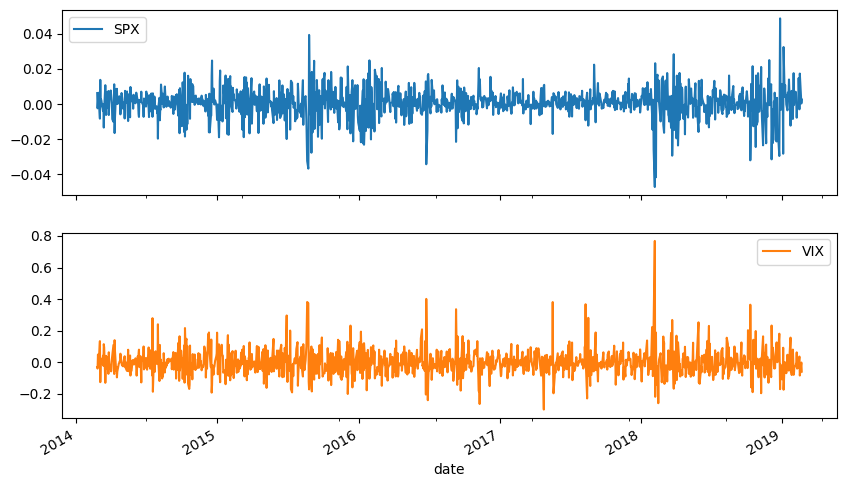

In [111]:
# get log returns
returns = np.log(data / data.shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(10,6))

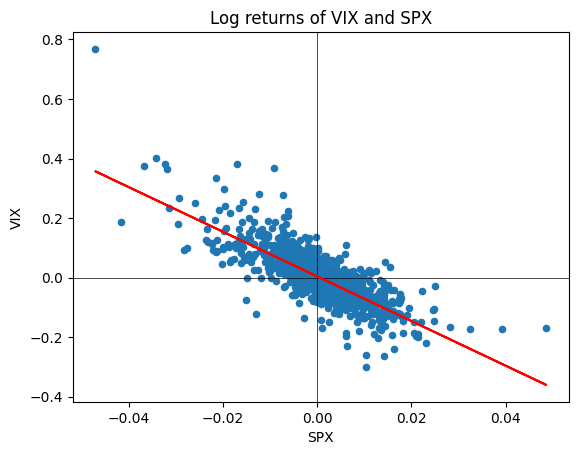

In [122]:
# plotting log returns of SPX and VIX with OLS regression
fig, ax = plt.subplots()
returns.plot(ax=ax,kind='scatter',x='SPX',y='VIX', title='Log returns of VIX and SPX')
ax.axhline(y=0, c='k', lw=0.5)
ax.axvline(x=0, c='k', lw=0.5)

reg = np.polyfit(returns.SPX, returns.VIX, deg=1)
ax.plot(returns.SPX, np.polyval(reg, returns.SPX), c='r')

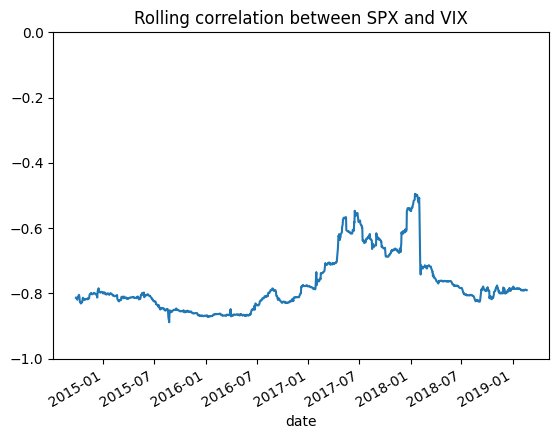

In [136]:
# test correlation
roll_corr = returns.SPX.rolling(window=150).corr(returns.VIX)
fig, ax = plt.subplots()
roll_corr.plot(ax=ax,title='Rolling correlation between SPX and VIX')
ax.set_ybound(-1,0)